In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("cleaned_nacional.csv", encoding='latin-1')

Gravedad del Accidente.

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'cleaned_nacional.csv'
df = pd.read_csv(file_path, encoding='latin-1')

print("Datos cargados exitosamente.")
print(df.head())  # Mostrar las primeras filas

Datos cargados exitosamente.
   EDO  MES  ANIO  MPIO  HORA  MINUTOS  DIA  DIASEMANA  URBANA  SUBURBANA  \
0    1    1  2019     1     4        0    3          4       1          0   
1    1    1  2019     1     9       45    3          4       1          0   
2    1    1  2019     1    10       40    3          4       1          0   
3    1    1  2019     1    14       55    3          4       1          0   
4    1    1  2019     1    19        0    3          4       1          0   

   ...  CICLMUERTO  CICLHERIDO  OTROMUERTO  OTROHERIDO  TOTMUERTOS  \
0  ...           0           0           0           0           0   
1  ...           0           0           0           0           0   
2  ...           0           0           0           0           0   
3  ...           0           0           0           0           0   
4  ...           0           0           0           0           0   

   TOTHERIDOS  CLASE                                      CALLE1   LONGITUD  \
0       

Cálculo del Índice de Gravedad.

In [ ]:
# Crear la columna de gravedad
df['GRAVEDAD'] = 2 * df['TOTMUERTOS'] + df['TOTHERIDOS']

print("Columna de gravedad creada exitosamente.")
print(df[['TOTMUERTOS', 'TOTHERIDOS', 'GRAVEDAD']].head())  # Verificar la columna

Columna de gravedad creada exitosamente.
   TOTMUERTOS  TOTHERIDOS  GRAVEDAD
0           0           0         0
1           0           0         0
2           0           0         0
3           0           1         1
4           0           0         0


In [ ]:
# Selección de variables para el agrupamiento
variables = ['GRAVEDAD', 'LATITUD', 'LONGITUD', 'TIPACCID']

# Normalización de los datos
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(df[variables])

print("Normalización completada.")
print("Datos normalizados (primeros 5):")
print(datos_scaled[:5])

Normalización completada.
Datos normalizados (primeros 5):
[[-0.317662   -0.61984752 -0.09156108  0.46134887]
 [-0.317662   -0.60729155 -0.08474908 -0.53366272]
 [-0.317662   -0.61154056 -0.08880129 -0.53366272]
 [ 1.25778871 -0.62630944 -0.08625966  2.45137206]
 [-0.317662   -0.61906901 -0.08763646 -0.53366272]]


<ipython-input-13-95243d065a3b>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K_range, inertia, 'bo-', color='blue')


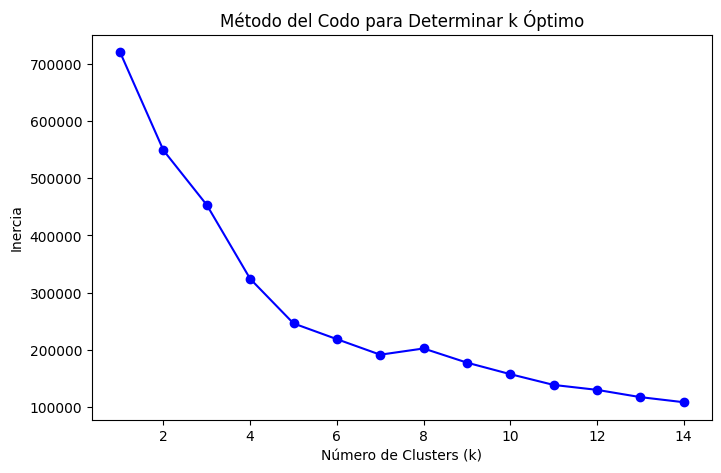

In [ ]:
# Determinación del número óptimo de clusters (método del codo)
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', color='blue')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k Óptimo')
plt.show()

In [ ]:
# Ajuste del modelo con el número óptimo de clusters
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans.fit_predict(datos_scaled)

# Agregar los clusters al DataFrame original
df['CLUSTER'] = clusters

print("Modelo KMeans ajustado exitosamente.")
print(df[['GRAVEDAD', 'LATITUD', 'LONGITUD', 'TIPACCID', 'CLUSTER']].head())

Modelo KMeans ajustado exitosamente.
   GRAVEDAD   LATITUD   LONGITUD  TIPACCID  CLUSTER
0         0  21.87119 -102.31962         4        0
1         0  21.91522 -102.28652         1        0
2         0  21.90032 -102.30621         1        0
3         1  21.84853 -102.29386        10        4
4         0  21.87392 -102.30055         1        0


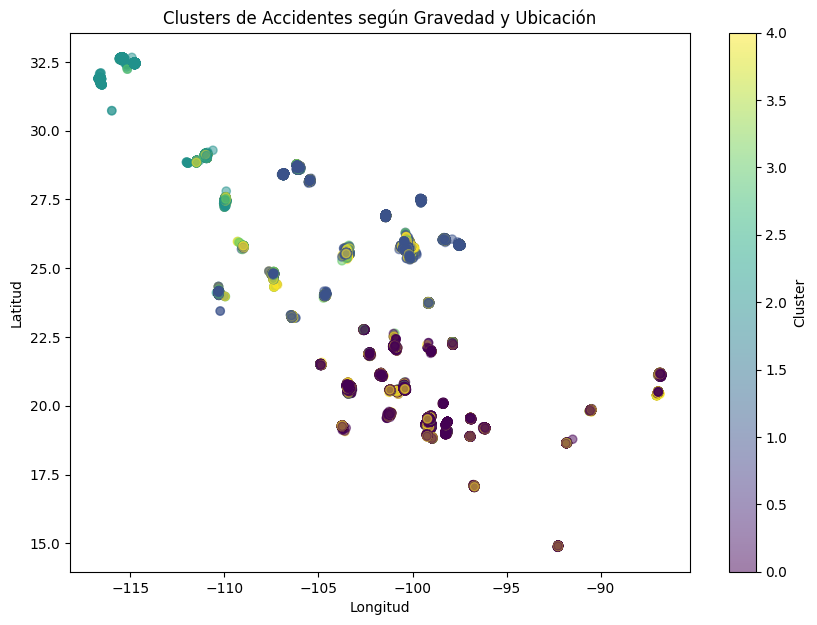

In [ ]:
# Visualización de los clusters en el espacio geográfico
plt.figure(figsize=(10, 7))
plt.scatter(df['LONGITUD'], df['LATITUD'], c=df['CLUSTER'], cmap='viridis', alpha=0.5)
plt.title('Clusters de Accidentes según Gravedad y Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Cluster')
plt.show()

Distribución de registros en cada cluster:
CLUSTER
1    82749
0    57291
4    20793
2    13544
3     5842
Name: count, dtype: int64
Gravedad promedio por cluster:
CLUSTER
0    0.090468
1    0.067699
2    0.127215
3    2.707121
4    0.385466
Name: GRAVEDAD, dtype: float64


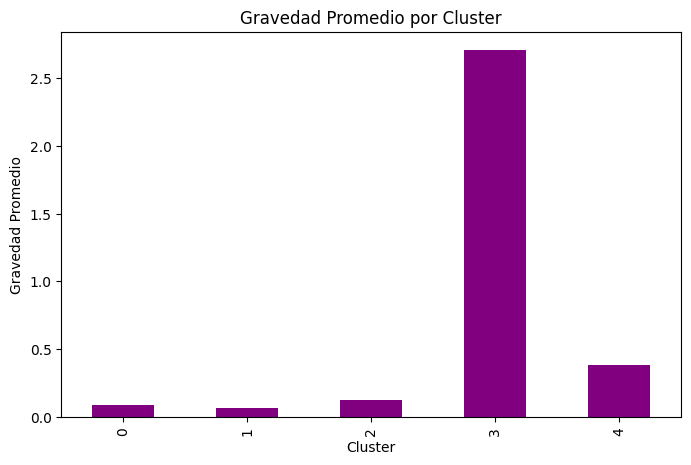

In [ ]:
# Contar cuántos registros hay en cada cluster
cluster_counts = df['CLUSTER'].value_counts()
print("Distribución de registros en cada cluster:")
print(cluster_counts)

# Calcular la gravedad promedio por cluster
gravedad_cluster = df.groupby('CLUSTER')['GRAVEDAD'].mean()
print("Gravedad promedio por cluster:")
print(gravedad_cluster)

# Gráfico de barras para comparar la gravedad promedio
plt.figure(figsize=(8, 5))
gravedad_cluster.plot(kind='bar', color='purple')
plt.title('Gravedad Promedio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gravedad Promedio')
plt.show()

El grupo 3 tiene una mayor cantidad de muertos y/o heridos.

In [ ]:
# Crear una variable de clasificación según la hora del día
def clasificar_hora(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Crear la columna 'HORA_DEL_DIA' a partir de la hora registrada
df['HORA_DEL_DIA'] = df['HORA'].apply(clasificar_hora)

print("Columna 'HORA_DEL_DIA' creada exitosamente.")
print(df[['HORA', 'HORA_DEL_DIA']].head())  # Verificar el resultado

Columna 'HORA_DEL_DIA' creada exitosamente.
   HORA HORA_DEL_DIA
0     4    Madrugada
1     9       Mañana
2    10       Mañana
3    14        Tarde
4    19        Noche


Distribución de Tipos de Accidente en el Cluster 3:
TIPACCID
1     3104
10    1029
2      761
4      564
5      182
6       77
7       66
11      27
9       15
12      10
3        6
8        1
Name: count, dtype: int64

Distribución de la Hora del Día en el Cluster 3:
HORA_DEL_DIA
Noche        1763
Tarde        1678
Mañana       1438
Madrugada     963
Name: count, dtype: int64


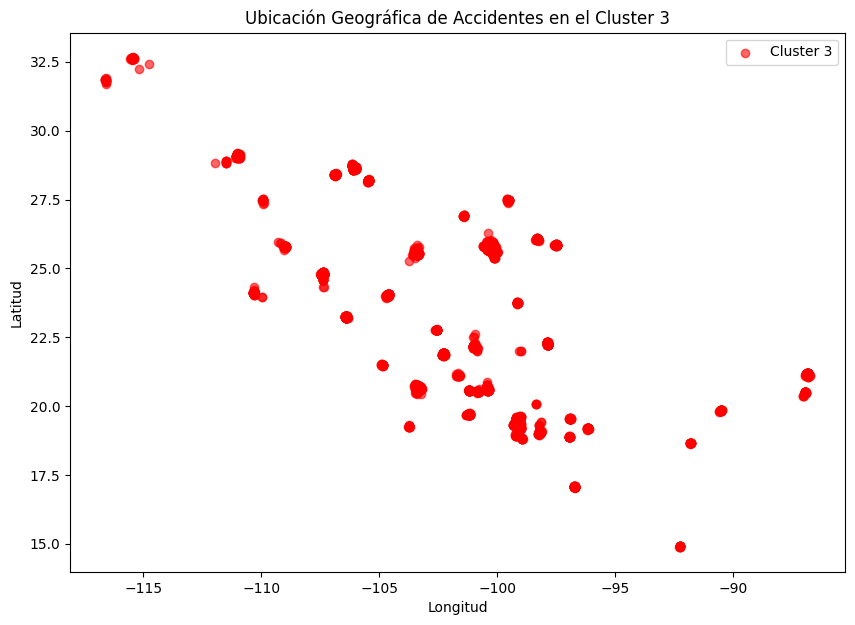

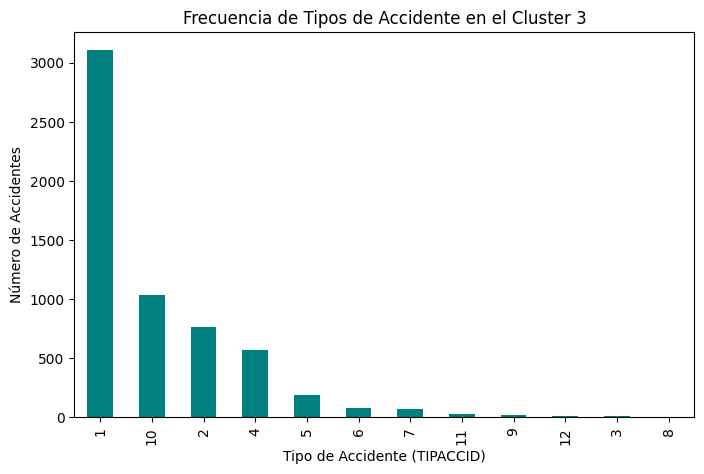

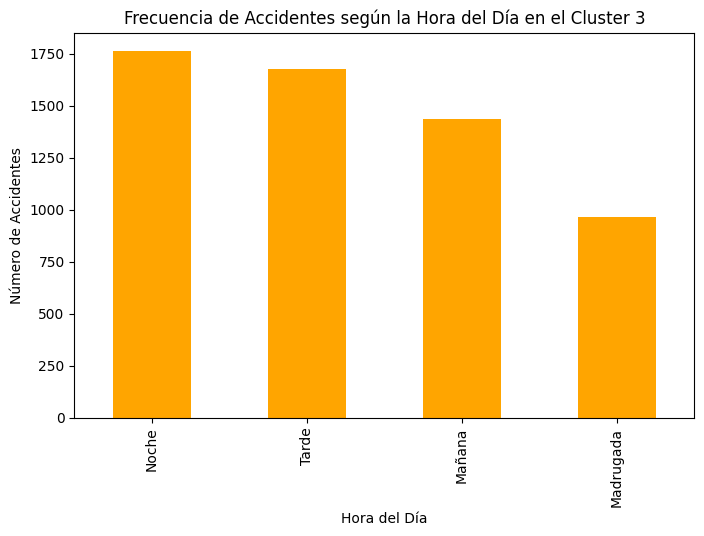

In [ ]:
# Filtrar solo el Cluster 3 (el de mayor gravedad)
cluster_3 = df[df['CLUSTER'] == 3]

# Análisis del Tipo de Accidente (TIPACCID)
tipo_accidente_counts = cluster_3['TIPACCID'].value_counts()
print("Distribución de Tipos de Accidente en el Cluster 3:")
print(tipo_accidente_counts)

# Análisis de la Hora del Día (HORA_DEL_DIA)
hora_dia_counts = cluster_3['HORA_DEL_DIA'].value_counts()
print("\nDistribución de la Hora del Día en el Cluster 3:")
print(hora_dia_counts)

# Mapa de los accidentes del Cluster 3 para visualizar ubicación geográfica
plt.figure(figsize=(10, 7))
plt.scatter(cluster_3['LONGITUD'], cluster_3['LATITUD'], alpha=0.6, c='red', label='Cluster 3')
plt.title('Ubicación Geográfica de Accidentes en el Cluster 3')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

# Gráfico de barras: Tipo de Accidente
plt.figure(figsize=(8, 5))
tipo_accidente_counts.plot(kind='bar', color='teal')
plt.title("Frecuencia de Tipos de Accidente en el Cluster 3")
plt.xlabel("Tipo de Accidente (TIPACCID)")
plt.ylabel("Número de Accidentes")
plt.show()

# Gráfico de barras: Hora del Día
plt.figure(figsize=(8, 5))
hora_dia_counts.plot(kind='bar', color='orange')
plt.title("Frecuencia de Accidentes según la Hora del Día en el Cluster 3")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Accidentes")
plt.show()